train data =  60000
test  data =  10000


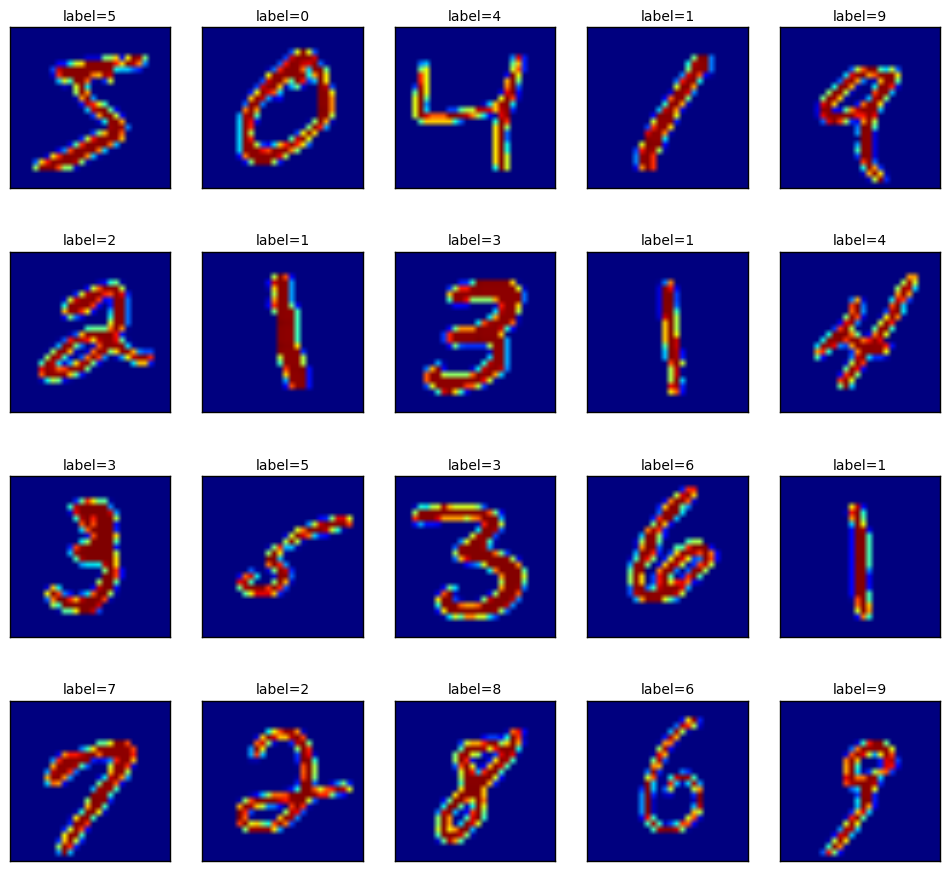

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
np.random.seed(10)

from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label) = mnist.load_data()

print('train data = ',len(x_train_image))
print('test  data = ',len(x_test_image))



"""
def plot_image(image):
     fig = plt.gcf()
     fig.set_size_inches(2,2)
     plt.imshow(image)
     plt.show()

for n in range(10):
    plot_image(x_train_image[n])
"""
    

def plot_image_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx])
        title ="label="+str(labels[idx])
        if len(prediction)>0 : 
            title+=",predict"+str(prediction[idx]) 
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])#設定不顯示刻度
        idx+=1
    plt.show()


plot_image_labels_prediction(x_train_image,y_train_label,[],0,20)

In [78]:
#pre-size
print('x_train_images:',x_train_image.shape)
print('y_train_labels:',y_train_label.shape)

#reshape
x_train = x_train_image.reshape(60000,784).astype('float32')
x_test  = x_test_image.reshape(10000,784).astype('float32')

#after-size
print('x_train:',x_train.shape)
print('x_test :',x_test .shape)

#normalize
x_train_normalize = x_train/255
y_test_normalize  = x_test/255

#label
y_train_label[:5]

#OntHot encoding(Prepocess)
y_trainOneHot = np_utils.to_categorical(y_train_label)
y_testOneHot = np_utils.to_categorical(y_test_label)
y_trainOneHot[:5]

x_train_images: (60000, 28, 28)
y_train_labels: (60000,)
x_train: (60000, 784)
x_test : (10000, 784)


array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [79]:
#Train-Tensorflow
#build Model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
print(model.summary())

#setting loss,optimzier, metrics
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#train
train_history = model.fit(x = x_train_normalize, y = y_trainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
1s - loss: 0.4402 - acc: 0.8823 - val_loss: 0.2183 - val_acc: 0.9406
Epoch 2/10
1s - loss: 0.1911 - acc: 0.9457 - val_loss: 0.1565 - val_acc: 0.9556
Epoch 3/10
1s - loss: 0.1357 - acc: 0.9616 - val_loss: 0.1264 - val_acc: 0.9644
Epoch 4/10
1s - loss: 0.1030 - acc: 0.9705 - val_loss: 0.1122 - val_acc: 0.9673
Epoch 5/10
1s - loss: 0.0813 - acc: 0.9773 - val_loss: 0.0987 - val_acc: 0.9716
Epoch 6/10
1s - loss: 0.0661 - acc: 0.9816 - val_loss: 0.0948 - val_acc: 0.97

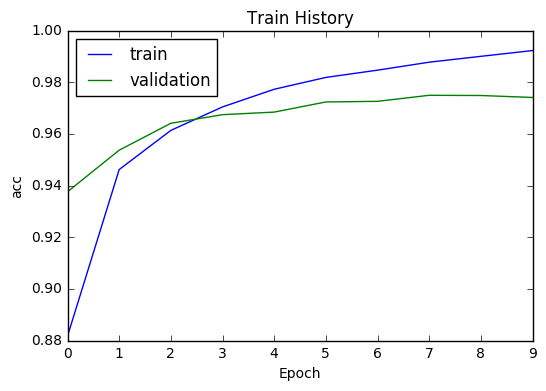

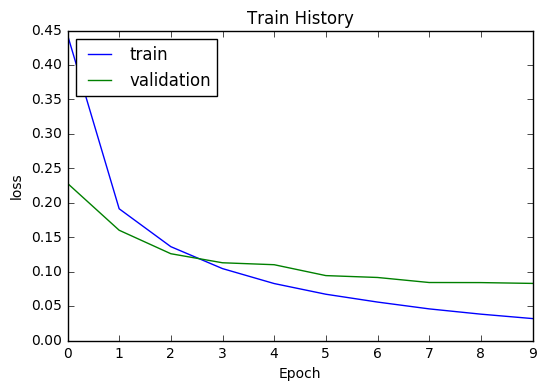

 9600/10000 [===========================>..] - ETA: 0s

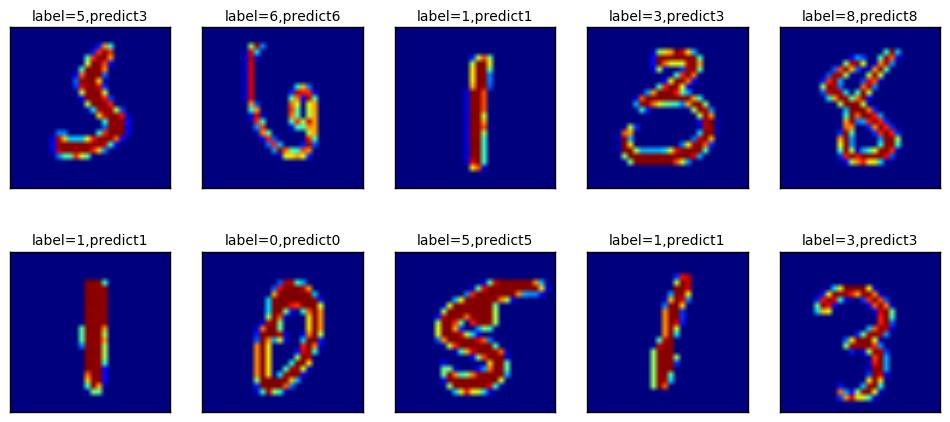

In [61]:
#display-Reslut
import matplotlib.pyplot as plt
def show_train_history(train_history,train,Validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[Validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
    
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


#score
scores = model.evaluate(y_test_normalize, y_testOneHot)
print('accuary=',scores[1])


#prdict
prediction = model.predict_classes(x_test)
prediction #prdiction has package of 10 data
plot_image_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

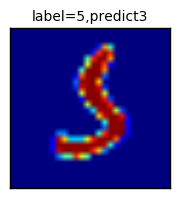

In [76]:
#check-ERROR
#Confusion matrix
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

#dataframe
df = pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:2]
df[(df.label==5)&(df.predict==3)]

#check
plot_image_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)